In [0]:
########IMPORTS
#!pip install --upgrade tensorflow
import os
from google.colab import drive
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



In [0]:
drive.mount('/content/gdrive')
#Dataset 1 - Bike Sharing
os.chdir('/content/gdrive/My Drive/Project4 Dataset/Bike-Sharing-Dataset')
bike_day_df = pd.read_csv('day.csv')
#Dataset 2 - Youtube Videos
os.chdir('/content/gdrive/My Drive/Project4 Dataset/online_video_dataset')
transcoding_df = pd.read_csv('transcoding_mesurment.tsv', sep='\t', header=0)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Question 1

Plot a heatmap of Pearson correlation matrix of dataset columns. Report which features have the highest absolute correlation with the target variable and what that implies. 

b_size is removed from the correlation matrix!


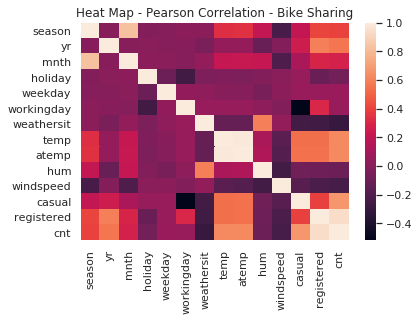

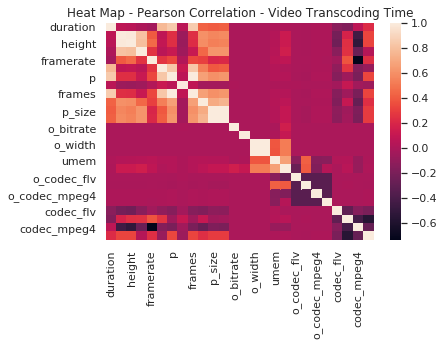

In [0]:
#Dataset 1
bike_day_pearson = bike_day_df.corr(method='pearson')
#filter out non feature columns and rows 
bike_day_pearson = bike_day_pearson.drop(labels=['instant'],axis=0)
bike_day_pearson = bike_day_pearson.drop(labels=['instant'],axis=1)

#Dataset 2 
transcoding_pearson = transcoding_df.corr(method='pearson')
transcoding_pearson = transcoding_pearson.drop(labels='b_size',axis=0)
transcoding_pearson = transcoding_pearson.drop(labels='b_size',axis=1)
print('b_size is removed from the correlation matrix!')

ax = plt.figure()
plt.title('Heat Map - Pearson Correlation - Bike Sharing')
ax = sns.heatmap(bike_day_pearson)
plt.show()
bx = plt.figure()
plt.title('Heat Map - Pearson Correlation - Video Transcoding Time')
ax = sns.heatmap(transcoding_pearson)
plt.show()

For *Bike Sharing* dataset: 'temp', 'atemp', 'year' and 'season' seem to be correlated with our main target which is 'cnt' - total count. This is also expected as the temperature should be a limiting factor for bike users (cold weather might force them not to use bikes etc.). The 'season' appears in our list. This is also expected as it is also correlated with temperature. One can check this with the heatmap also.

For *Video Transcoding Time* dataset: 'o_width' and 'o_heigt' seem to be correlated with our main target 'utime'. This makes sense as the output width and height in pixel used for transcoding should be correlated to total transcoding time for transcoding

# Question 2

Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness? 

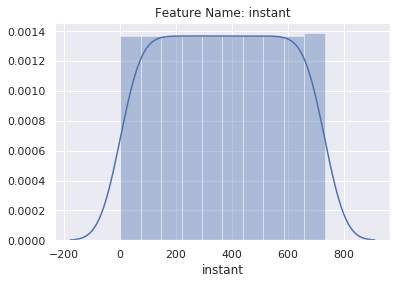

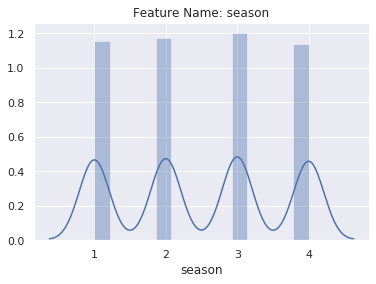

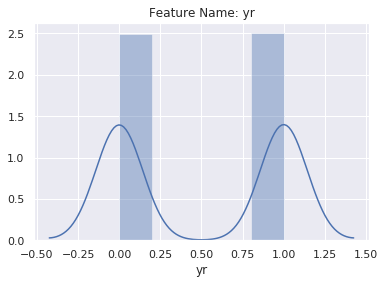

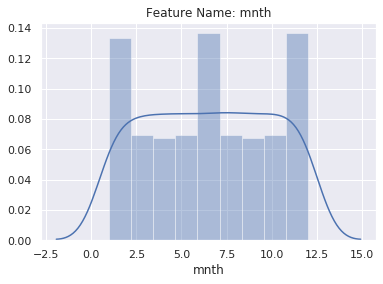

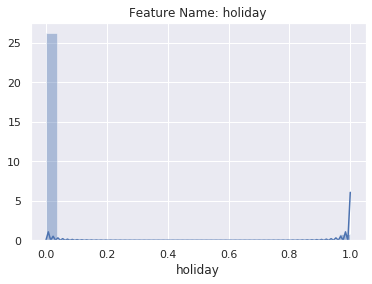

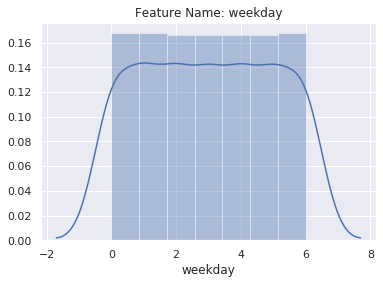

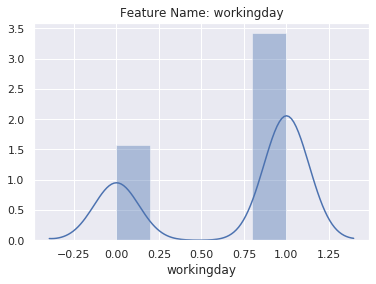

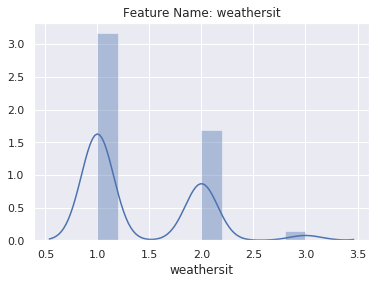

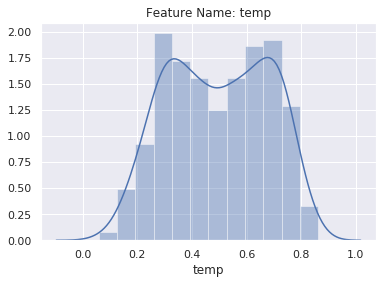

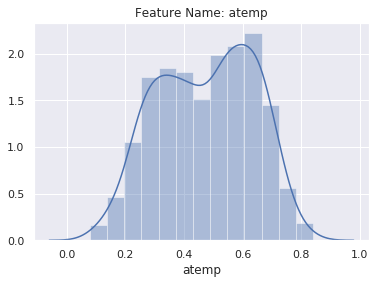

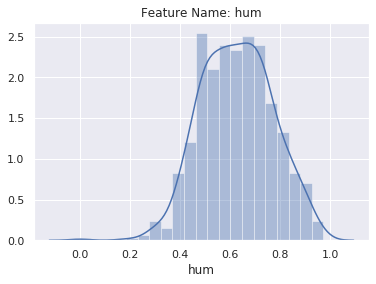

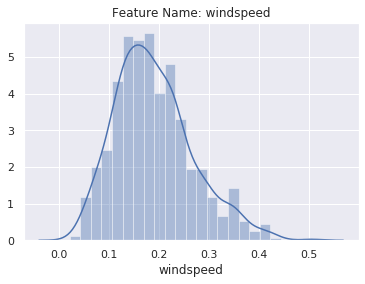

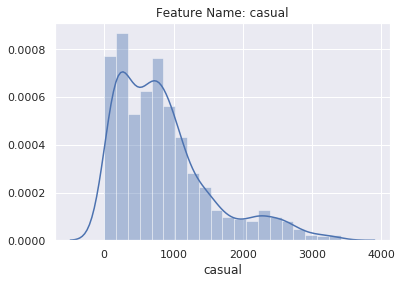

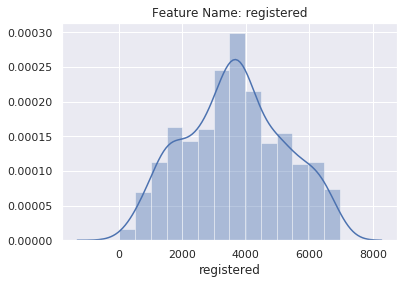

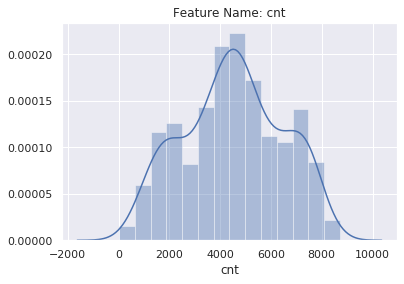

Histograms for Video Transcoding Time


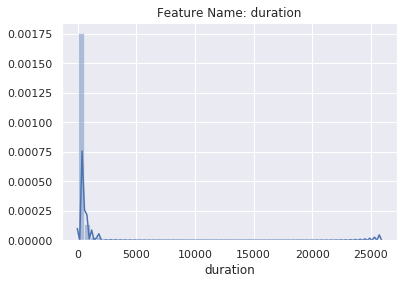

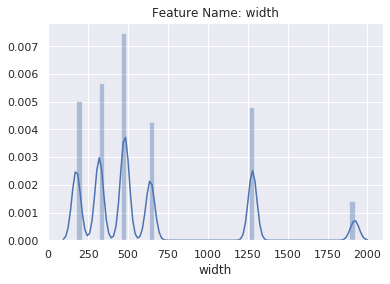

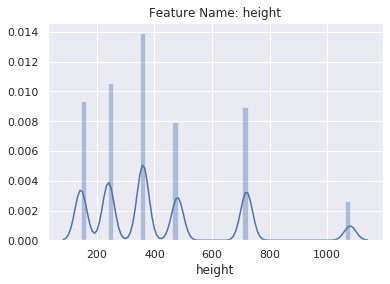

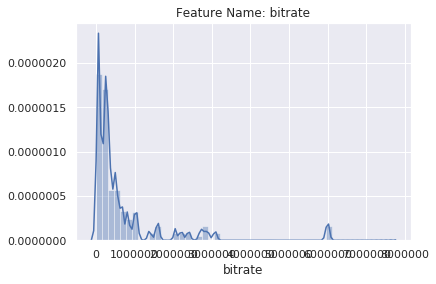

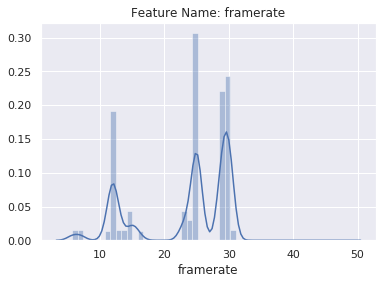

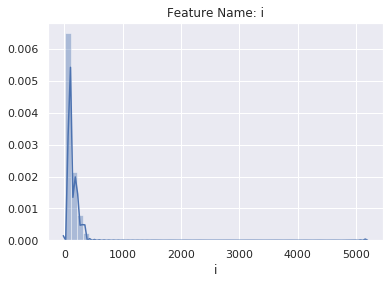

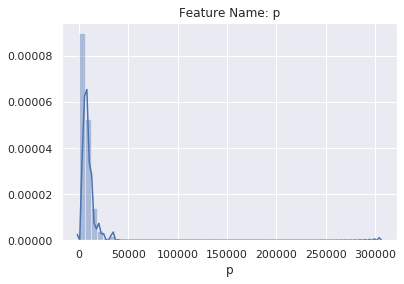

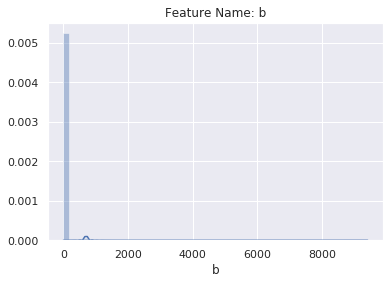

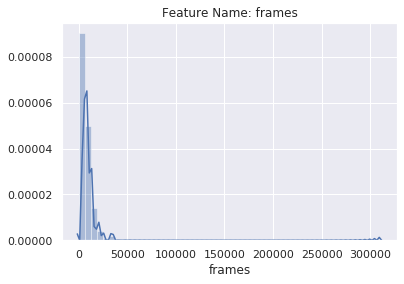

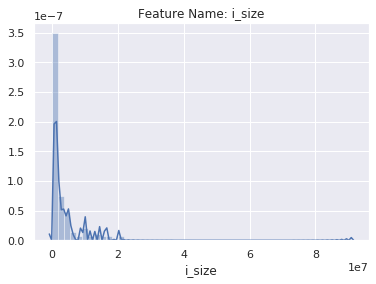

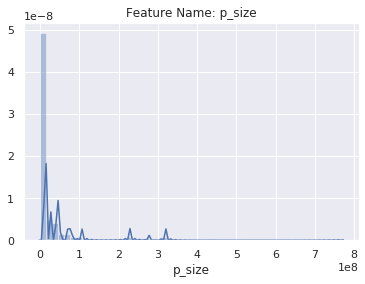

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


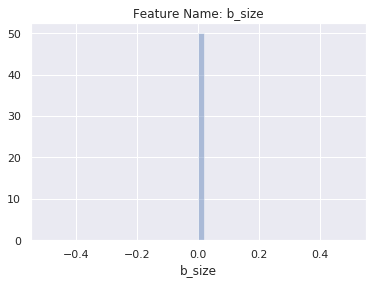

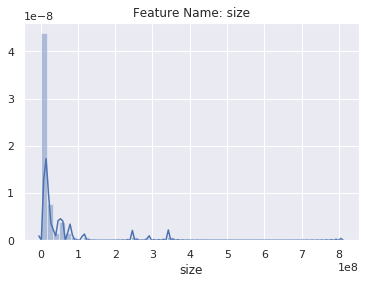

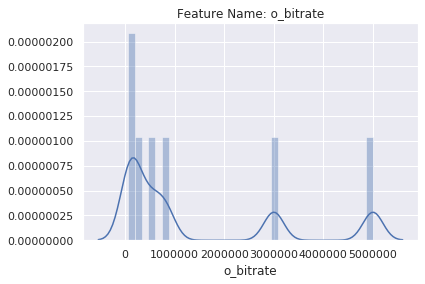

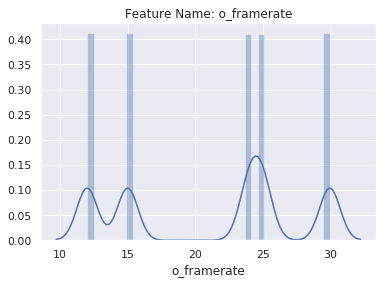

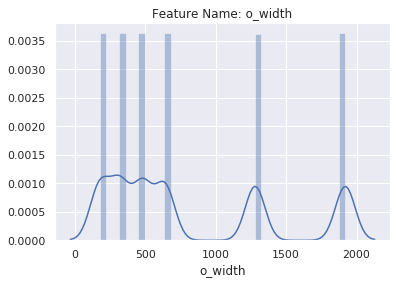

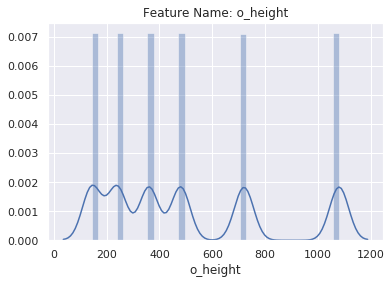

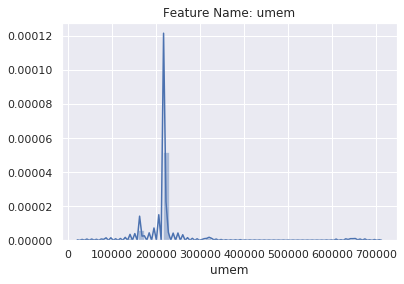

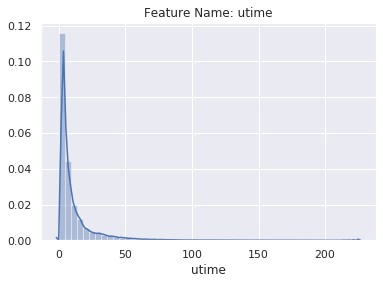

In [0]:
#Bike Sharing 
for column_name in bike_day_df.columns:
  if isinstance((bike_day_df.get(column_name).values[0]),(np.float64,np.int64)):
    plt.figure
    plt.title('Feature Name: ' + column_name)
    #ax = bike_day_df.get(column_name).plot.hist()
    ax = sns.distplot(bike_day_df.get(column_name))
    plt.show()

#Video Transcoding Time
print('Histograms for Video Transcoding Time')
for column_name in transcoding_df.columns:
  if isinstance((transcoding_df.get(column_name).values[0]),(np.float64,np.int64)):
    plt.figure
    plt.title('Feature Name: ' + column_name)
    #ax = transcoding_df.get(column_name).plot.hist(alpha=0.5)
    ax = sns.distplot(transcoding_df.get(column_name))
    plt.show()

# Question 3

Inspect box plot of categorical features vs target variable. What intuition do you get?

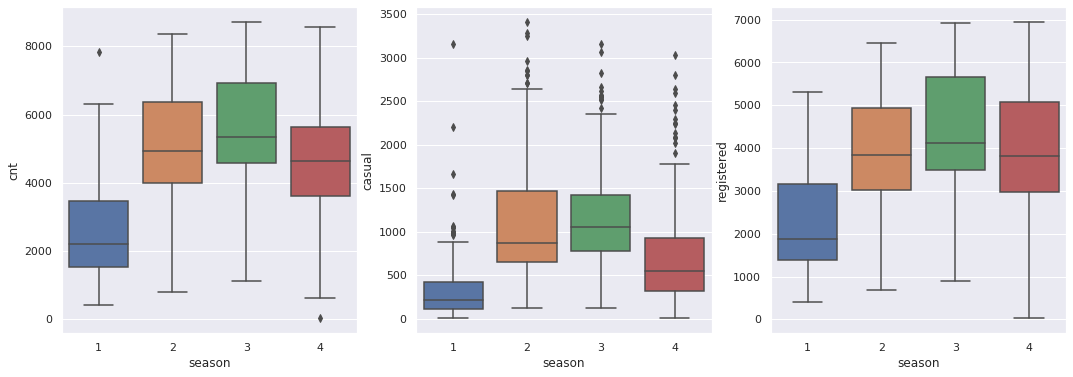

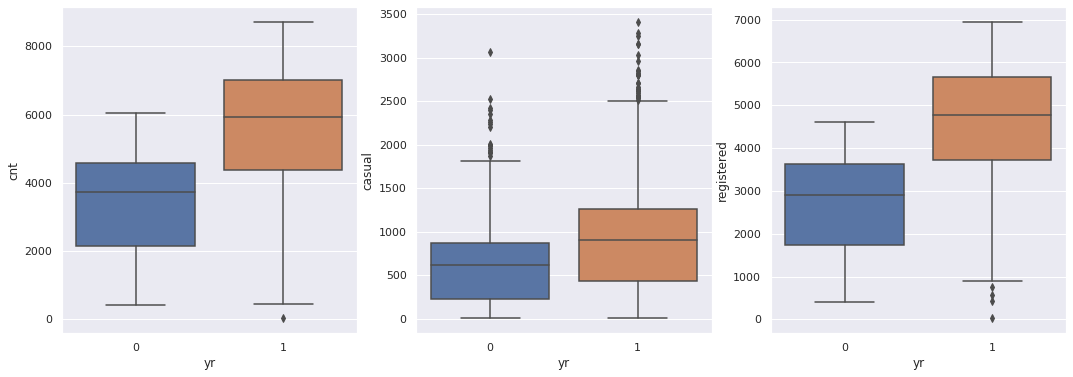

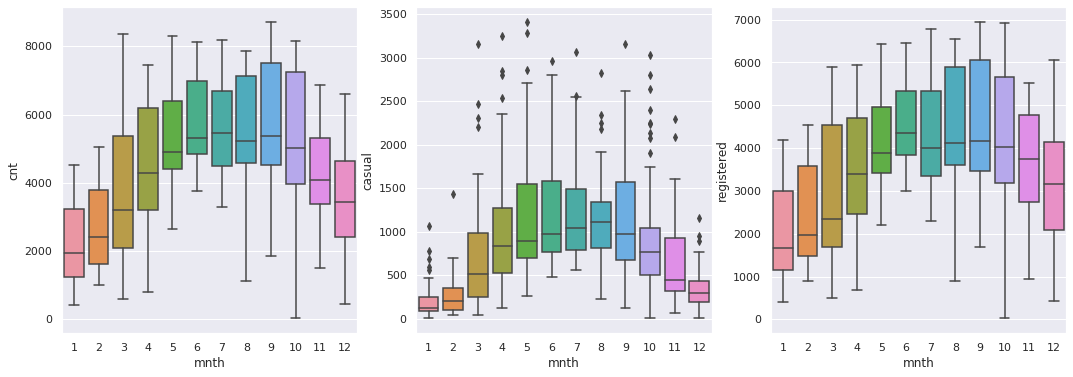

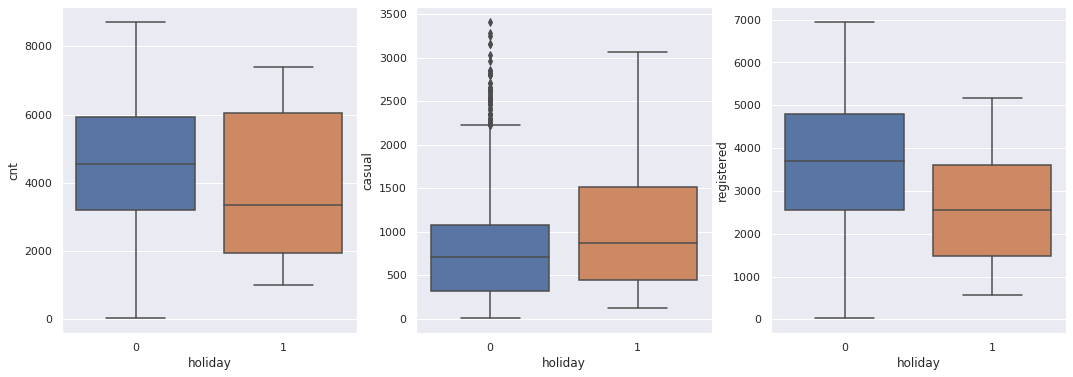

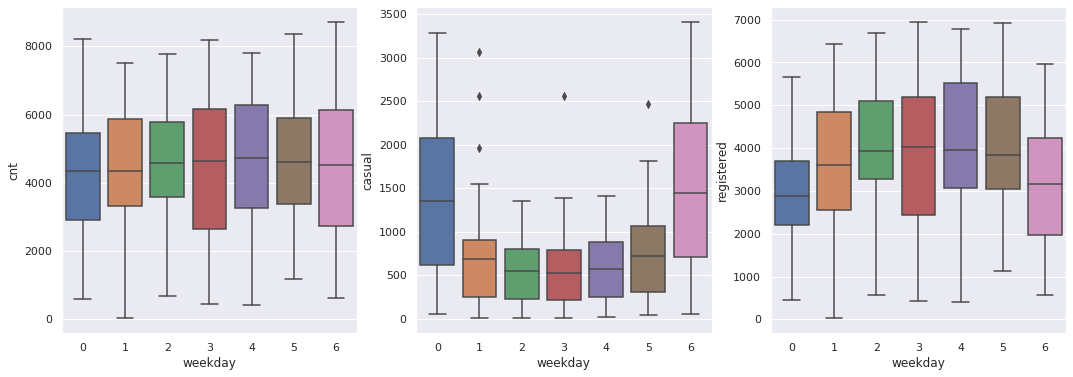

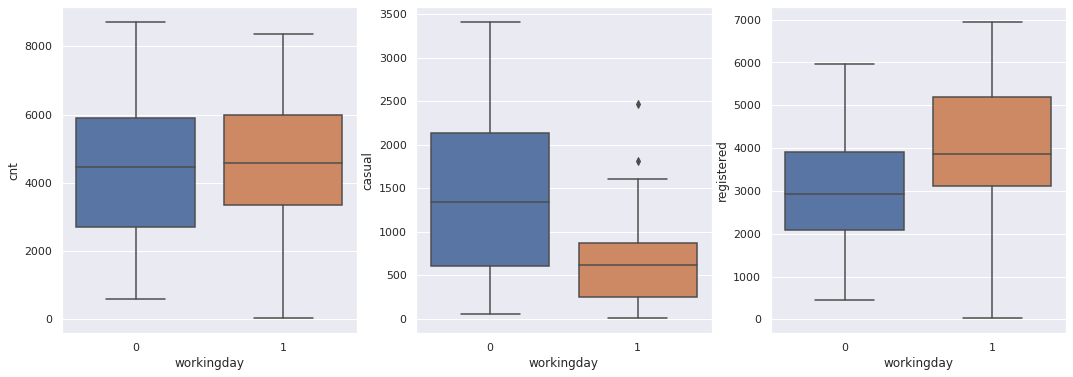

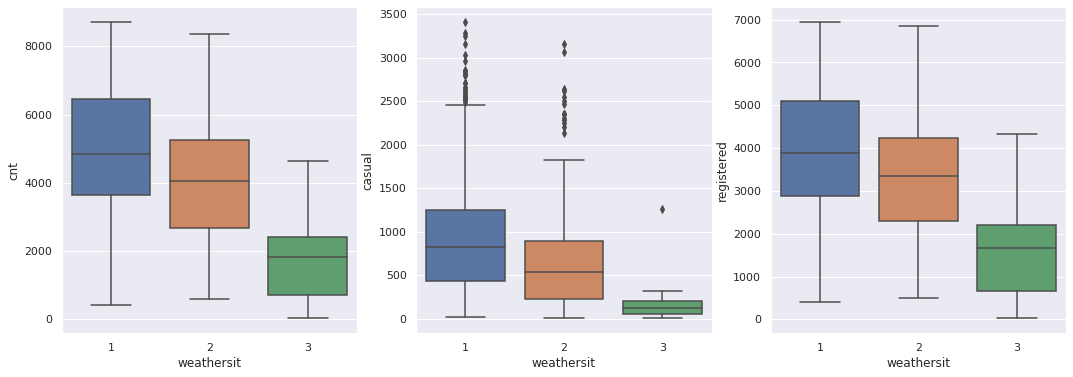

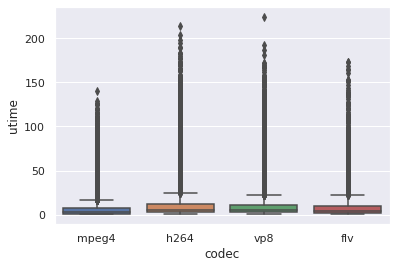

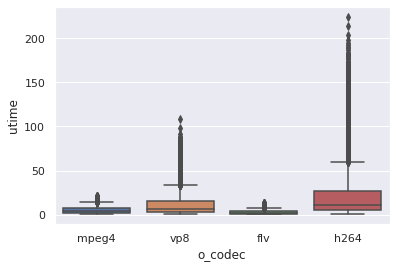

In [0]:
categorical_features_bike = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feat in categorical_features_bike:
  plt.figure(figsize=(18,6))
  #boxplot = bike_day_df.boxplot(column=['cnt','casual','registered'],by=[feat],layout=(1, 3),figsize=(15,6))
  plt.subplot(1,3,1)
  ax = sns.boxplot(x=bike_day_df.get(feat), y=bike_day_df.get('cnt'))
  plt.subplot(1,3,2)
  ax = sns.boxplot(x=bike_day_df.get(feat), y=bike_day_df.get('casual'))
  plt.subplot(1,3,3)
  ax = sns.boxplot(x=bike_day_df.get(feat), y=bike_day_df.get('registered'))

categorical_features_video = ['codec', 'o_codec']
for feat in categorical_features_video:
  plt.figure()
  #boxplot = transcoding_df.boxplot(column=['utime'],by=[feat],layout=(1, 1),figsize=(15,6))
  ax = sns.boxplot(x=transcoding_df.get(feat), y=transcoding_df.get('utime'))


# Question 4

For bike sharing dataset, plot the count number per day for a few months. Can you identify any repeating patterns in every month?

In [0]:
for j in range(2):
  print('Year: ',j)
  for i in range(12):
    if i !=0:
      print('The # of days in month ' + str(i) + ': ',((bike_day_df.mnth == i).values*(bike_day_df.yr == j).values).sum())

Year:  0
The # of days in month 1:  31
The # of days in month 2:  28
The # of days in month 3:  31
The # of days in month 4:  30
The # of days in month 5:  31
The # of days in month 6:  30
The # of days in month 7:  31
The # of days in month 8:  31
The # of days in month 9:  30
The # of days in month 10:  31
The # of days in month 11:  30
Year:  1
The # of days in month 1:  31
The # of days in month 2:  29
The # of days in month 3:  31
The # of days in month 4:  30
The # of days in month 5:  31
The # of days in month 6:  30
The # of days in month 7:  31
The # of days in month 8:  31
The # of days in month 9:  30
The # of days in month 10:  31
The # of days in month 11:  30


# Question 5

For video transcoding time dataset, plot the distribution of video transcoding times, what can you observe? Report mean and median transcoding times.

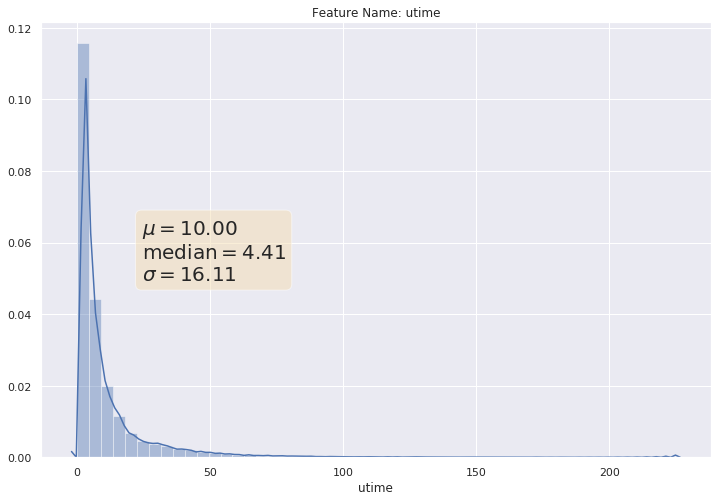

In [0]:
plt.figure(figsize=(12,8))
plt.title('Feature Name: ' + column_name)
ax = sns.distplot(transcoding_df.utime)
mu = transcoding_df.utime.values.mean()
median = np.median(transcoding_df.utime.values)
sigma = transcoding_df.utime.values.std()
textstr = '\n'.join((
  r'$\mu=%.2f$' % (mu, ),
  r'$\mathrm{median}=%.2f$' % (median, ),
  r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.15, 0.55, textstr, transform=ax.transAxes, fontsize=20,
      verticalalignment='top', bbox=props)
plt.show()

# ONE HOT ENCODING FOR BIKE SHARE

In [0]:

# use pd.concat to join the new columns with your original dataframe
bike_day_df_labels=bike_day_df.cnt
bike_day_df = pd.concat([bike_day_df,pd.get_dummies(bike_day_df['season'], prefix='season')],axis=1)
bike_day_df = pd.concat([bike_day_df,pd.get_dummies(bike_day_df['yr'], prefix='yr')],axis=1)
bike_day_df = pd.concat([bike_day_df,pd.get_dummies(bike_day_df['mnth'], prefix='mnth')],axis=1)
bike_day_df = pd.concat([bike_day_df,pd.get_dummies(bike_day_df['weekday'], prefix='weekday')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
bike_day_df.drop(['season'],axis=1, inplace=True)
bike_day_df.drop(['yr'],axis=1, inplace=True)
bike_day_df.drop(['mnth'],axis=1, inplace=True)
bike_day_df.drop(['weekday'],axis=1, inplace=True)
bike_day_df.drop(['casual'],axis=1, inplace=True)
bike_day_df.drop(['registered'],axis=1, inplace=True)
bike_day_df.drop(['dteday'],axis=1, inplace=True)
bike_day_df.drop(['cnt'],axis=1, inplace=True)
bike_day_df.drop(['instant'],axis=1, inplace=True)



In [0]:
bike_day_df

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,2,0.344167,0.363625,0.805833,0.160446,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,2,0.254167,0.226642,0.652917,0.350133,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
727,0,1,2,0.253333,0.255046,0.590000,0.155471,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
728,0,0,2,0.253333,0.242400,0.752917,0.124383,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
729,0,0,1,0.255833,0.231700,0.483333,0.350754,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


# ONE HOT ENCODING FOR ONLINE VIDEO

In [0]:
transcoding_df

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


In [0]:
transcoding_df_labels=transcoding_df.utime
transcoding_df = pd.concat([transcoding_df,pd.get_dummies(transcoding_df['o_codec'], prefix='o_codec')],axis=1)
transcoding_df = pd.concat([transcoding_df,pd.get_dummies(transcoding_df['codec'], prefix='codec')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
transcoding_df.drop(['o_codec'],axis=1, inplace=True)
transcoding_df.drop(['codec'],axis=1, inplace=True)
transcoding_df.drop(['utime'],axis=1, inplace=True)
transcoding_df.drop(['id'],axis=1, inplace=True)


In [0]:
transcoding_df

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8,codec_flv,codec_h264,codec_mpeg4,codec_vp8
0,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,56000,12.00,176,144,22508,0,0,1,0,0,0,1,0
1,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,56000,12.00,320,240,25164,0,0,1,0,0,0,1,0
2,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,56000,12.00,480,360,29228,0,0,1,0,0,0,1,0
3,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,56000,12.00,640,480,34316,0,0,1,0,0,0,1,0
4,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,56000,12.00,1280,720,58528,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,0,33886358,242000,24.00,640,480,88692,1,0,0,0,0,1,0,0
68780,129.88100,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,0,10379630,539000,29.97,1920,1080,107524,0,0,1,0,0,0,0,1
68781,249.68000,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,0,11215178,539000,12.00,176,144,88708,1,0,0,0,0,0,0,1
68782,183.62334,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,0,65359329,539000,12.00,320,240,88724,0,0,1,0,0,1,0,0


# Question 7

In [0]:
temp_values=bike_day_df.get(bike_day_df.columns[2:13])
temp_values_norm=preprocessing.StandardScaler()
tep_sc=temp_values_norm.fit_transform(temp_values)
bike_day_df=pd.DataFrame(pd.concat([tep_sc,bike_day_df.get(bike_day_df.columns[13:16])]))
bike_day_df[2]


In [0]:
for columns in bike_day_df.columns:
  print('Before:')
  print('mean: ', bike_day_df[columns].mean())
  print('std: ', bike_day_df[columns].std()**2)
  bike_day_df[columns] -= bike_day_df[columns].mean()
  bike_day_df[columns] /= bike_day_df[columns].std()
  print('After:')
  print('mean: ', bike_day_df[columns].mean())
  print('std: ', bike_day_df[columns].std()) 

Before:
mean:  0.028727770177838577
std:  0.027940707981185503
After:
mean:  -1.435999821864686e-16
std:  1.0000000000000027
Before:
mean:  0.6839945280437757
std:  0.2164421040796033
After:
mean:  -8.444377588120206e-17
std:  1.0000000000000009
Before:
mean:  1.3953488372093024
std:  0.2969098438993271
After:
mean:  5.054476369292094e-16
std:  1.0000000000000118
Before:
mean:  0.49538478850889184
std:  0.03350766717740824
After:
mean:  6.761577162286179e-16
std:  1.0
Before:
mean:  0.47435398864569067
std:  0.026556345661055164
After:
mean:  9.47410564652767e-16
std:  0.9999999999999997
Before:
mean:  0.6278940629274962
std:  0.020286047141930278
After:
mean:  2.81261562148198e-15
std:  1.0000000000000004
Before:
mean:  0.1904862116279068
std:  0.00600591996019276
After:
mean:  2.3343540203130857e-15
std:  1.0
Before:
mean:  0.2476060191518468
std:  0.18655248018289827
After:
mean:  -4.538093567140859e-16
std:  1.0000000000000002
Before:
mean:  0.25170998632010944
std:  0.188610085639

# Question 8

In [0]:
temp = bike_day_df#features bike dataset
temp2=bike_day_df_labels#labels bike dataset

In [0]:
MI_cnt=mutual_info_regression(np.asarray(bike_day_df)[:,2:13],np.asarray(bike_day_df)[:,15],discrete_features=False)
mask_MI = MI_cnt > 0.2
temp_red = bike_day_df.get(bike_day_df.columns[2:13][mask_MI])
temp2=bike_day_df.get(bike_day_df.columns[15])

In [0]:

Fscore_cnt,pval_cnt=f_regression(temp,temp2,center=True)
mask_fscore = Fscore_cnt > 10
temp_red = bike_day_df.get(bike_day_df.columns[2:13][mask_fscore])

In [0]:
print(MI_cnt)

[0.21625476 0.27672547 0.37660255 0.01102209 0.04502828 0.02413923
 0.06628467 0.38895299 0.46460755 0.04648487 0.0559334 ]


In [0]:
print(Fscore_cnt)
np.mean(Fscore_cnt)

[143.96765259 344.89058554  62.00462455   3.42144104   3.33109137
   2.73674228  70.72929783 473.47171053 482.45431053   7.46194
  42.43784159]


148.80974889511404

In [0]:
#temp_red=bike_day_df.get(bike_day_df.columns[2:5],bike_day_df.columns[8:11])
#temp_red=bike_day_df.get(bike_day_df.columns[3:5])
#temp_red=pd.concat([temp_red,bike_day_df.get(bike_day_df.columns[8:11])],axis=1)

#print(temp_red.shape)
#temp_red=pd.concat([temp_red,bike_day_df.get(bike_day_df.columns[12])],axis=1)
#print(temp_red.shape)

In [0]:
X_temp, X_test, y_temp, y_test = train_test_split(temp, temp2, test_size=0.2)
#X_temp = X_temp.get(X_temp.columns[3:9])
#kf = KFold(n_splits=5)

#for train, test in kf.split(temp):
  #X_temp = X_temp.iloc[train]
  #X_test =  X_temp.iloc[test]  
  #y_temp = y_temp.iloc[train]
  #y_test = y_temp.iloc[test]


#X_train, X_val , y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)

In [0]:
X_temp.shape

(584, 6)

In [0]:
#X_temp_red, X_test_red, y_temp_red, y_test_red = train_test_split(temp_red, temp2, test_size=0.2)
#X_train_red, X_val_red, y_train_red, y_val_red =train_test_split(X_temp_red, y_temp_red, test_size=0.25)

In [0]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_temp):
  #print("%s %s" % (train.shape, test.shape))
  X_train_temp = X_temp.iloc[train]
  X_test_temp =  X_temp.iloc[test]  
  y_train_temp = y_temp.iloc[train]
  y_test_temp = y_temp.iloc[test]
  LGworeg = LinearRegression().fit(X_train_temp, y_train_temp)
  rmse_LGworeg=np.sqrt((((LGworeg.predict(X_test_temp)-y_test_temp))**2).sum()/X_test_temp.values.shape[0])
  print(rmse_LGworeg)

1523.8216662608654
1548.6316624172844
1469.2616363192951
1540.0600018207158
1314.3724162684055
1353.6039095427623
1392.8380199224719
1522.0614328881754
1451.206908651446
1525.2924487097334


In [0]:
LGworeg = LinearRegression().fit(X_train, y_train)
rmse_LGworeg=np.sqrt((((LGworeg.predict(X_test)-y_test))**2).sum())/X_test.values.shape[0]
LGworeg_red=LinearRegression().fit(X_train_red, y_train_red)
rmse_LGworeg_red=np.sqrt((((LGworeg_red.predict(X_test_red)-y_test_red))**2).sum())/X_test_red.values.shape[0]

In [0]:
temp[0]

In [0]:
rmse_LGworeg_red

69.36941334144718

In [0]:
LGworeg_red.predict(X_test_red)-y_test_red

409    -201.058928
184   -1364.055681
114     139.266198
193    1031.427994
483     264.485712
          ...     
493    -548.319157
240     119.656104
361   -1050.733150
425      44.253717
97      573.035964
Name: cnt, Length: 147, dtype: float64

In [0]:
(LGworeg_red.predict(X_test_red)-y_test_red).sum()

7511.234356332468

In [0]:
LG= LinearRegression().fit(X_train, y_train)
print(np.sqrt((((LG.predict(X_test)-y_test))**2).sum())/X_test.values.shape[0])
length_temp=X_train.shape[1]
#rmse=[]
current_rmse=5000000
while(True):
  rmse=[]
  for i in range (length_temp):
    #print(X_train.columns[-1])
    temp_feat=X_train.pop(X_train.columns[-1])
    #print(X_train.columns)
    LG= LinearRegression().fit(X_train, y_train)
    temp_feat_t=X_test.pop(X_test.columns[-1])
    rmse.append(np.sqrt((((LG.predict(X_test)-y_test))**2).sum())/X_test.values.shape[0])
    #print(rmse)
    X_train=pd.concat([temp_feat,X_train],axis=1)
    X_test=pd.concat([temp_feat_t,X_test],axis=1)
  #print(X_train.columns)
  if(current_rmse>np.min(rmse)):
    X_train.pop(X_train.columns.values[::-1][(np.argmin(rmse))])
    X_test.pop(X_test.columns.values[::-1][(np.argmin(rmse))])

    print(X_train.columns)
  else:
    print(X_train.columns)
    break
    
  current_rmse=np.min(rmse)

#X_train.pop(X_train.columns[abs(-1*(X_train.shape[1])+np.argmin(rmse))])

print(current_rmse)

In [0]:
X_train.shape

(438, 11)

In [0]:
X_test.shape

(147, 11)

In [0]:
X_val.shape

(146, 11)

In [0]:
def pipeline (model, X_temp, X_test ,y_temp, y_test , model_params,):

In [0]:
nn = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(300, 10),n_iter_no_change=100)
#nn.fit(X_train_temp,y_train_temp)
#print(np.sqrt((y_test_temp-nn.predict(X_test_temp))**2))
cv_results = cross_validate(nn, X_temp, y_temp,scoring=('neg_root_mean_squared_error'), cv=10)
sorted(cv_results.keys())
rmse_nn_folds=cv_results['test_score']


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
rmse_nn=np.mean(np.sqrt(-rmse_nn_folds))

In [0]:
print(rmse_nn)

42.03725995658512


In [0]:
y_test_pred=nn.predict(X_test)
print(np.sqrt((y_test_pred-y_test)**2))

# NEURAL NETWORK OPTIMIZATION

In [0]:
def compmodel(model_m):
  model_m.compile(
  optimizer='adam',
  loss='mean_squared_error',
  metrics=[tf.keras.metrics.RootMeanSquaredError(),'mae'],
)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

p1= [0.1, 0.2, 0.3, 0.4, 0.5]
d, e = (3, 2)
a1 = [11, 9, 8]
b1= [8, 7, 6]
c1= [6, 4, 3]
error = []
parameters = []
for p in p1:
  for b in b1:
    for c in c1:
      for a in a1:
        for i in range(5):
          parameters.append([i, a, b, c, d, e, p])
          print('Parameters: ', parameters[-1])
          if i==1:
            model = Sequential([
            Dropout(p, input_shape=(11,)),                    
            Dense(a, activation='relu', input_shape=(11,)),
            Dense(1, activation='linear'),])
          elif i==2:
            model = Sequential([
            Dropout(p, input_shape=(11,)),                 
            Dense(a, activation='relu', input_shape=(11,)),
            Dropout(p, input_shape=(a,)),
            Dense(b, activation='relu', input_shape=(a,)),
            Dense(1, activation='linear'),])
          elif i==3:
            model = Sequential([
            Dropout(p, input_shape=(11,)),                 
            Dense(a, activation='relu', input_shape=(11,)),
            Dropout(p, input_shape=(a,)),
            Dense(b, activation='relu', input_shape=(a,)),
            Dropout(p, input_shape=(b,)),
            Dense(c, activation='relu', input_shape=(b,)),
            Dense(1, activation='linear'),])
          elif i==4:
            model = Sequential([
            Dropout(p, input_shape=(11,)),                 
            Dense(a, activation='relu', input_shape=(11,)),
            Dropout(p, input_shape=(a,)),
            Dense(b, activation='relu', input_shape=(a,)),
            Dropout(p, input_shape=(b,)),
            Dense(c, activation='relu', input_shape=(b,)),
            Dropout(p, input_shape=(c,)),
            Dense(d, activation='relu', input_shape=(c,)),
            Dense(1, activation='linear'),])
          elif i==5:
            model = Sequential([
            Dropout(p, input_shape=(11,)),                 
            Dense(a, activation='relu', input_shape=(11,)),
            Dropout(p, input_shape=(a,)),
            Dense(b, activation='relu', input_shape=(a,)),
            Dropout(p, input_shape=(b,)),
            Dense(c, activation='relu', input_shape=(b,)),
            Dropout(p, input_shape=(c,)),
            Dense(d, activation='relu', input_shape=(c,)),
            Dropout(p, input_shape=(d,)),
            Dense(e, activation='relu', input_shape=(d,)),
            Dense(1, activation='linear'),])
          
          model.compile(
          optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error','mae'],
          )
          y_pred, y_val_temp, mean = nn_kfold(model)
          error.append(mean)
          print('\n', mean)

Streaming output truncated to the last 5000 lines.
Final result:  998.3695

 1062.1125479359482
Parameters:  [1, 9, 6, 6, 3, 2, 0.1]
Final result:  4425.016
Final result:  4771.246
Final result:  4477.7812
Final result:  4847.2246
Final result:  4561.461
Final result:  4722.4043
Final result:  4462.445
Final result:  5135.4146
Final result:  4605.664
Final result:  5212.401

 4722.1057899861125
Parameters:  [2, 9, 6, 6, 3, 2, 0.1]
Final result:  1094.7648
Final result:  1977.3525
Final result:  3507.2302
Final result:  2399.8386
Final result:  4687.8413
Final result:  1148.3883
Final result:  1792.915
Final result:  3083.9084
Final result:  2945.3467
Final result:  5070.241

 2770.782698101578
Parameters:  [3, 9, 6, 6, 3, 2, 0.1]
Final result:  1069.9441
Final result:  1025.1257
Final result:  946.0028
Final result:  969.29443
Final result:  1042.6202
Final result:  1088.2788
Final result:  1170.2825
Final result:  1222.0522
Final result:  955.52673
Final result:  878.15576

 1036.7283

In [0]:
#import keras as ks
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
from sklearn.model_selection import cross_validate
#from sklearn.cross_validate import StratifiedKFold
#from keras.metrics import RootMeanSquaredError
model = Sequential([
    #Dropout(0.2, input_shape=(6,)),                    
    Dense(11, activation='relu', input_shape=(11,)),
    Dense(1, activation='linear'),])

In [0]:

model.compile(
  optimizer='adam',
  loss='mean_squared_error',
  metrics=['mean_squared_error','mae'],
)

In [0]:
model.fit(
  X_temp, # training data
  y_temp, # training targets
  epochs=20,
  batch_size=64,
)

Train on 584 samples
Epoch 1/20
584/584 [==============================] - 0s 611us/sample - loss: 23693995.8356 - mean_squared_error: 23693998.0000 - mae: 4479.5127
Epoch 2/20
584/584 [==============================] - 0s 42us/sample - loss: 23692699.2603 - mean_squared_error: 23692698.0000 - mae: 4479.3896
Epoch 3/20
584/584 [==============================] - 0s 49us/sample - loss: 23691499.2877 - mean_squared_error: 23691498.0000 - mae: 4479.2417
Epoch 4/20
584/584 [==============================] - 0s 38us/sample - loss: 23690183.3562 - mean_squared_error: 23690184.0000 - mae: 4479.1055
Epoch 5/20
584/584 [==============================] - 0s 46us/sample - loss: 23689070.5479 - mean_squared_error: 23689068.0000 - mae: 4478.9995
Epoch 6/20
584/584 [==============================] - 0s 40us/sample - loss: 23687132.3288 - mean_squared_error: 23687132.0000 - mae: 4478.7910
Epoch 7/20
584/584 [==============================] - 0s 45us/sample - loss: 23685727.7534 - mean_squared_error: 2

In [0]:
import tensorflow as tf
n_folds = 10
#skf = cross_validate.StratifiedKFold(y_temp, n_folds=n_folds, shuffle=True)
kf = KFold(n_splits=10)

def nn_kfold(nn_model):
  rmse = []
  temp_weights = nn_model.get_weights()
  for train, val in kf.split(X_temp):
    #print("%s %s" % (train.shape, test.shape))
    nn_model.set_weights(temp_weights)
    X_train_temp = X_temp.iloc[train]
    X_val_temp =  X_temp.iloc[val]  
    y_train_temp = y_temp.iloc[train]
    y_val_temp = y_temp.iloc[val]
    nn_model.fit(
    X_train_temp, # training data
    y_train_temp, # training targets
    epochs=500,
    batch_size=64,
    verbose=False
    )
    y_pred= model.predict(X_val_temp)
    m = tf.keras.metrics.RootMeanSquaredError()
    m.update_state(y_pred, y_val_temp.values[:,np.newaxis])
    print('Final result: ', m.result().numpy())
    rmse.append(np.sqrt(np.mean((y_pred-y_val_temp.values[:,np.newaxis])**2)))
    #print(rmse[-1])
  return y_pred, y_val_temp.values[:,np.newaxis], np.mean(rmse)
y_pred, y_val_temp, mean = nn_kfold(model)
print('\n', mean)

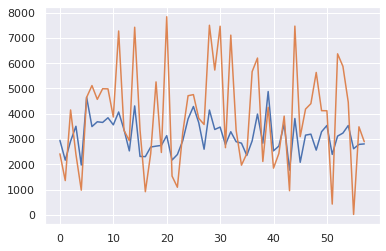

In [0]:
plt.plot(y_pred)
plt.plot(y_val_temp)
plt.show()

In [0]:
y_pred.shape

(58, 1)

In [0]:
y_pred-y_val_temp.values[:,np.newaxis]

array([[-3542.54597473],
       [-2364.19648695],
       [-2270.5279541 ],
       [-5274.61132812],
       [-6618.44750977],
       [-4976.44555664],
       [-3946.04553223],
       [-2325.42932129],
       [-3210.50549316],
       [-4025.15606689],
       [-3616.34814453],
       [-4383.14794922],
       [-6299.66455078],
       [-1274.40673828],
       [-1619.19648695],
       [-3878.71765137],
       [-2811.004076  ],
       [-1345.19648695],
       [-3889.06469727],
       [-1534.19648695],
       [-2291.95361328],
       [-4688.50195312],
       [-5261.60913086],
       [-3830.90079498],
       [-1536.00756836],
       [-4686.41967773],
       [-4373.81958008],
       [-4547.59423828],
       [-4003.40856934],
       [-3816.42333984],
       [-2249.80749512],
       [-3225.64772034],
       [-5664.83288574],
       [-1402.19648695],
       [-3761.20874023],
       [-2333.5491333 ],
       [-4204.56494141],
       [-5200.87841797],
       [-2782.578125  ],
       [-5435.9465332 ],


In [0]:
pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 22kB/s 
     |████████████████████████████████| 3.8MB 64.1MB/s 
     |████████████████████████████████| 450kB 78.0MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


# Random Forest


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.ensemble import RandomForestRegressor


In [0]:
#regressor =RandomForestRegressor (n_estimators=10,max_features,max_features)
X_temp, X_test, y_temp, y_test = train_test_split(temp, temp2, test_size=0.2)
#regressor.fit(temp,temp2)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1500, num = 100)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 1, stop = 32, num = 32)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 100, num = 50)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 601, 611, 621, 631, 641, 651, 661, 671, 681, 691, 702, 712, 722, 732, 742, 752, 762, 772, 782, 792, 803, 813, 823, 833, 843, 853, 863, 873, 883, 893, 904, 914, 924, 934, 944, 954, 964, 974, 984, 994, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095, 1106, 1116, 1126, 1136, 1146, 1156, 1166, 1176, 1186, 1196, 1207, 1217, 1227, 1237, 1247, 1257, 1267, 1277, 1287, 1297, 1308, 1318, 1328, 1338, 1348, 1358, 1368, 1378, 1388, 1398, 1409, 1419, 1429, 1439, 1449, 1459, 1469, 1479, 1489, 1500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'max_depth': [20, 21, 23, 24, 26, 28, 29, 31, 33, 34, 36, 37, 39, 41, 42, 44, 46, 47, 49, 51, 52, 54, 55, 57, 59, 60, 62, 64, 65, 67, 68, 70, 72, 73, 75, 77, 78, 80, 82, 83, 85, 86, 88, 90, 91, 93, 95, 96, 98, 100]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(oob_score=True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#grid_sc=GridSearchCV(estimator = rf, param_grid= random_grid,  cv = 3, verbose=2, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_temp, y_temp)
#grid_sc.fit(X_temp,y_temp)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
rf_random.best_params_

{'max_depth': 26, 'max_features': 7, 'n_estimators': 762}

{'mean_fit_time': array([8.33718427]),
 'mean_score_time': array([0.34054534]),
 'mean_test_score': array([0.85568332]),
 'param_max_depth': masked_array(data=[79],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[3055],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 79, 'max_features': 'sqrt', 'n_estimators': 3055}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.89520847]),
 'split1_test_score': array([0.85593116]),
 'split2_test_score': array([0.81591033]),
 'std_fit_time': array([1.94410189]),
 'std_score_time': array([0.08018101]),
 'std_test_score': array([0.0323738])}

Text(0.5, 1.0, 'OOB values for different hyperparameters')

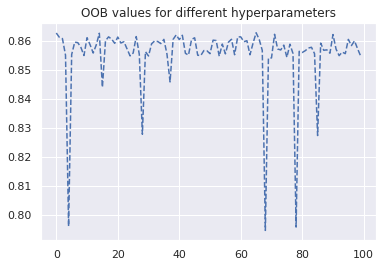

In [0]:
plt.plot(rf_random.cv_results_.get('mean_test_score'),'--')
plt.title('OOB values for different hyperparameters')

In [0]:
rf_random.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators

In [0]:
from sklearn.metrics import r2_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = np.sqrt(np.sum(((predictions - test_labels)**2))/predictions.shape[0]) 
    print(r2_score(predictions, test_labels)) 
    print('Model Performance')
    print('RMSE: {:0.4f} '.format((errors)))
    
    return errors
  

In [0]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

0.8842710200286167
Model Performance
RMSE: 589.0865 


In [0]:
rf_random.oob_

In [0]:
rf_random.cv_results_

{'mean_fit_time': array([2.44875582, 4.18859045, 4.88147235, 7.04444639, 1.58652226,
        2.65102792, 2.6485498 , 5.12889711, 3.35381166, 3.40905372,
        3.48880212, 3.91889763, 5.0694201 , 4.48118377, 4.84668183,
        2.29969128, 2.87677558, 3.52743951, 4.4559083 , 2.79091263,
        5.00195122, 5.13107204, 4.91650089, 5.49711585, 3.64617809,
        6.39448754, 1.67807921, 6.13290795, 4.30383158, 6.23668909,
        3.29000123, 3.25098062, 2.91673462, 3.87979436, 1.66268404,
        3.51170142, 4.35631299, 3.54972736, 5.16685192, 3.67326927,
        2.89717611, 1.67066844, 3.86604333, 3.57624873, 2.99654706,
        3.85799654, 4.19199411, 4.85965443, 3.35458565, 5.66176693,
        3.91522535, 2.96762164, 5.1699748 , 4.15479398, 3.06121111,
        4.15213116, 3.3108623 , 4.24054416, 3.12333727, 2.91223741,
        3.25023349, 2.11936649, 4.74043075, 2.49804179, 3.69200548,
        2.49629688, 3.52013183, 5.72053194, 2.13621895, 4.47412936,
        4.01004569, 3.99449762,

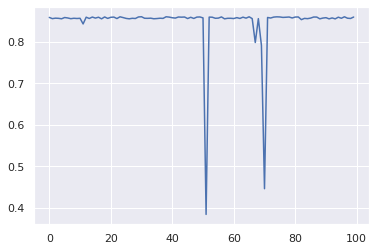

In [0]:
cv_results = rf_random.cv_results_['split1_test_score']
plt.plot(cv_results)

In [0]:
random_accuracy=np.zeros(32)
random_accuracy1=np.zeros(32)
for i in range(31):
  rf = RandomForestRegressor(n_estimators=940,max_depth=22,max_features=i+1,oob_score=True)
  a=rf.fit(X_temp,y_temp)
  #print(a.oob_score_)
  random_accuracy[i]= evaluate(rf, X_test, y_test)
  a=rf.fit(X_temp,y_temp)
  #print(a.oob_score_)
  random_accuracy1[i]= evaluate(rf, X_temp, y_temp)



Model Performance
Average Error: 871.3953 degrees.
Model Performance
Average Error: 297.8544 degrees.
Model Performance
Average Error: 779.5246 degrees.
Model Performance
Average Error: 275.6137 degrees.
Model Performance
Average Error: 735.0835 degrees.
Model Performance
Average Error: 260.3416 degrees.
Model Performance
Average Error: 717.5557 degrees.
Model Performance
Average Error: 253.3713 degrees.
Model Performance
Average Error: 699.6280 degrees.
Model Performance
Average Error: 252.8478 degrees.
Model Performance
Average Error: 701.3676 degrees.
Model Performance
Average Error: 249.2854 degrees.
Model Performance
Average Error: 693.3675 degrees.
Model Performance
Average Error: 246.6605 degrees.
Model Performance
Average Error: 695.3152 degrees.
Model Performance
Average Error: 245.0419 degrees.
Model Performance
Average Error: 690.0321 degrees.
Model Performance
Average Error: 246.4779 degrees.
Model Performance
Average Error: 692.5491 degrees.
Model Performance
Average Error

Text(0, 0.5, 'RMSE')

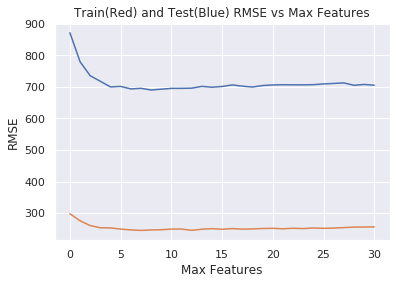

In [0]:
plt.plot(random_accuracy[0:31])
plt.plot(random_accuracy1[0:31])
plt.title('Train(Red) and Test(Blue) RMSE vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('RMSE')

In [0]:
8strr=[]
oob=[]
strr.append('auto')
strr.append('sqrt')
i=np.linspace(1000,5000,81)
for i in i:
  for j in range(150):
    for k in range(1):
      rf = RandomForestRegressor(n_estimators=i+1000,max_depth=j+1,max_features=strr[k],oob_score=True)
      a=rf.fit(X_temp,y_temp)
      oob.append([a.oob_score_,i,j,k])


In [0]:
import numpy as np
i=np.linspace(1000,5000,81)

print(i)

[1000. 1050. 1100. 1150. 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550.
 1600. 1650. 1700. 1750. 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150.
 2200. 2250. 2300. 2350. 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750.
 2800. 2850. 2900. 2950. 3000. 3050. 3100. 3150. 3200. 3250. 3300. 3350.
 3400. 3450. 3500. 3550. 3600. 3650. 3700. 3750. 3800. 3850. 3900. 3950.
 4000. 4050. 4100. 4150. 4200. 4250. 4300. 4350. 4400. 4450. 4500. 4550.
 4600. 4650. 4700. 4750. 4800. 4850. 4900. 4950. 5000.]


In [0]:
from sklearn.tree import export_graphviz


In [0]:
export_graphviz(rf.estimators_[2], 
                out_file='tree.dot', 
                feature_names = X_temp.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [0]:
rf.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=22,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=871052458, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=22,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2115387056, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=22,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_dec

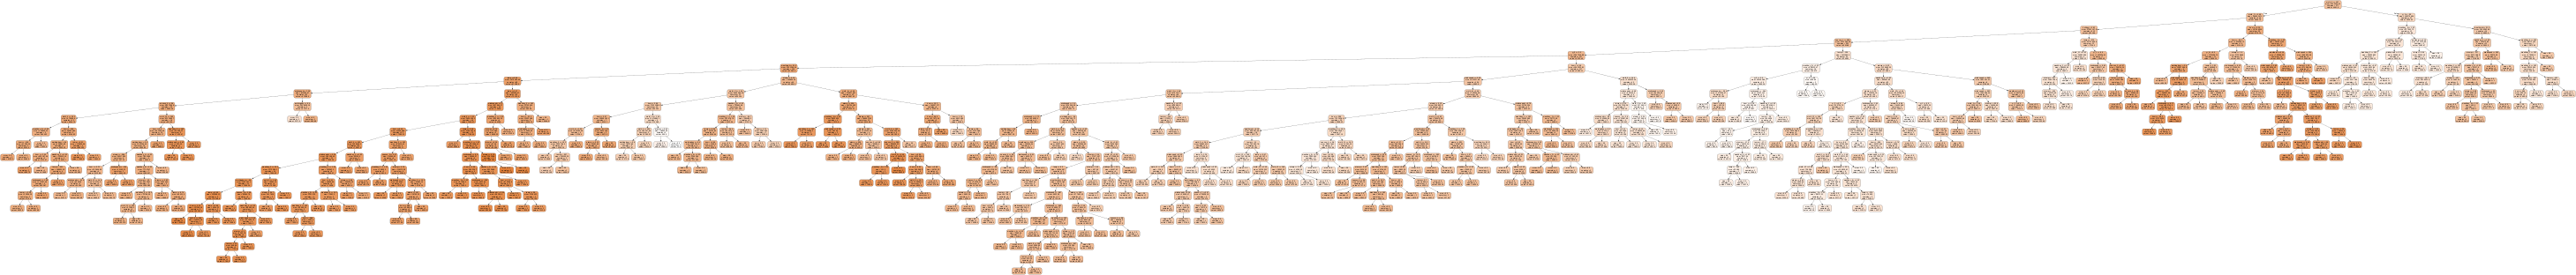

In [0]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=10'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_:
  print(i_tree)
  export_graphviz(tree_in_forest,max_depth=4,
  out_file='tree.dot', 
  feature_names = X_temp.columns,
  rounded = True, proportion = False, 
  precision = 2, filled = True)
  (graph,) = pydot.graph_from_dot_file('tree.dot')
  name = 'tree' + str(i_tree)
  graph.write_png(name+'.png')
  os.system('dot -Tpng tree.dot -o tree.png')
  i_tree +=1

In [0]:
tree_in_forest.set_params(max_depth=4)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2115387056, splitter='best')

In [0]:
from sklearn import linear_model
import sklearn
def model_kfold(model, X_temp,verbose):
  kf = KFold(n_splits=10)
  rmse_list = []
  for train, test in kf.split(X_temp):
    #print("%s %s" % (train.shape, test.shape))
    X_train_temp = X_temp.iloc[train]

    X_test_temp=X_temp.iloc[test]
    y_train_temp=y_temp.iloc[train]
    y_test_temp=y_temp.iloc[test]
    model=sklearn.base.clone(model)
    modelFitted=model.fit(X_train_temp, y_train_temp)
    rmse_list.append(np.sqrt((((modelFitted.predict(X_test_temp)-y_test_temp.values))**2).sum()/X_test_temp.values.shape[0]))
  if verbose:
    print('Validation set RMSE: ', np.mean(rmse_list))
  return np.mean(rmse_list), modelFitted

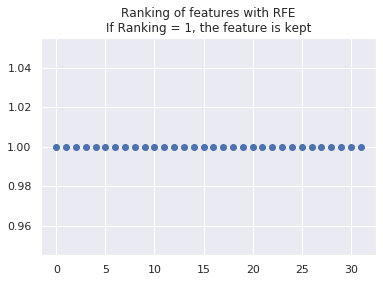

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Test set RMSE (best_model) after feature selection:  613.5824574702413
Model Performance
Average Error: 596.8955 degrees.


In [0]:
#Feature Selection

import sklearn
from sklearn.feature_selection import RFE
best_model_temp = sklearn.base.clone(best_random)
rfe = RFE(estimator=best_model_temp, step=1, n_features_to_select=32)
rfe.fit(X_temp, y_temp)
ranking = rfe.ranking_

# Plot  ranking
plt.plot(ranking,'o')
plt.title("Ranking of features with RFE" + "\nIf Ranking = 1, the feature is kept")
plt.show()
print(rfe.support_)
X_temp_eliminated = pd.DataFrame(X_temp.values[:,rfe.support_], columns=X_temp.columns[rfe.support_])
X_test_eliminated = pd.DataFrame(X_test.values[:,rfe.support_], columns=X_test.columns[rfe.support_])

rmse_mean, best_model_temp = model_kfold(best_model_temp, X_temp_eliminated, verbose=False)
print('Test set RMSE (best_model) after feature selection: ', np.sqrt((((best_model_temp.predict(X_test_eliminated)-y_test.values))**2).sum()/X_test_eliminated.values.shape[0]))
random_accuracy = evaluate(rf, X_test_eliminated, y_test)

In [0]:
rf = RandomForestRegressor(n_estimators=762,max_depth=26,max_features=7,oob_score=True)
a=rf.fit(X_temp,y_temp)
print(a.oob_score_)

0.873041067941862
